In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.patches as patches
import scipy.stats
h_cosm=6.62607015e-34

In [2]:
def VoidCorregido(ellip_cat):
    
    BoxLength = 720
    Trim = 30
    
    halfboxtrim = BoxLength/2 - Trim

    index = np.where( 
            (abs(ellip_cat[:,1]) < halfboxtrim)   & 
            (abs(ellip_cat[:,2]) < halfboxtrim)   & 
            (abs(ellip_cat[:,3]) < halfboxtrim) )
    
    return ellip_cat[index]

In [3]:
Catalogos=[]
for i in range(10):
    V=np.loadtxt("Datos/cosmos_0"+str(i)+".vae",delimiter=",")
    Catalogos.append(V)
for i in range(10,40):
    V=np.loadtxt("Datos/cosmos_"+str(i)+".vae",delimiter=",")
    Catalogos.append(V)

In [4]:
#Corregir Catálogos
CatalogosCorregidos=[]
for i in range(len(Catalogos)):
    VC=VoidCorregido(Catalogos[i])
    CatalogosCorregidos.append(VC)

In [5]:
#colores=["b","g","y","black","m","q","w","e","r","t","p","m"]

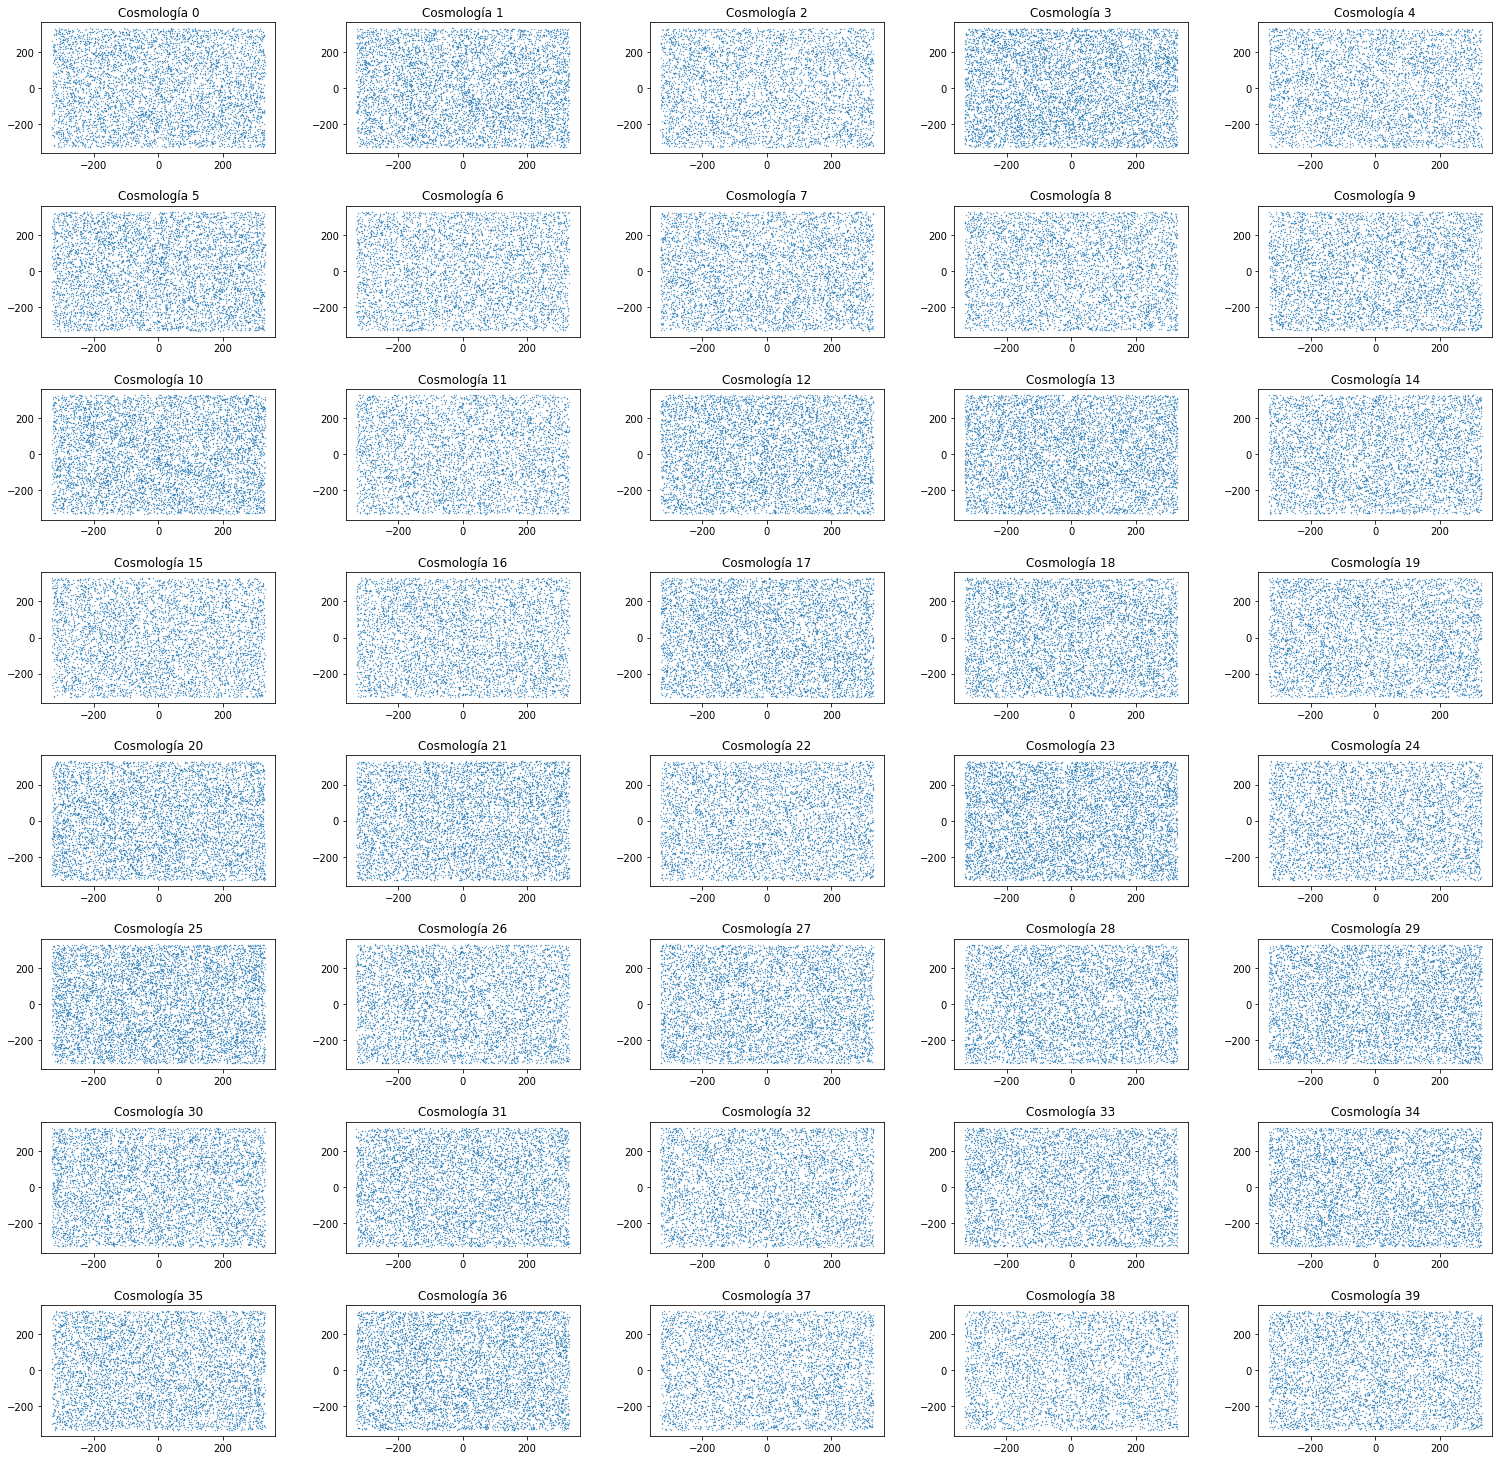

In [6]:
fig, axs = plt.subplots(8,5, figsize=(26, 26), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
for i in range(len(CatalogosCorregidos)):
    V=CatalogosCorregidos[i]
    axs[i].set_title("Cosmología " + str(i))
    axs[i].scatter(V[:,1],V[:,2],s=0.1)
    
#plt.savefig("Cosmologias.png")

In [7]:
def datosGeo(Catalogo):
    a=Catalogo[:,6]
    b=Catalogo[:,7]
    c=Catalogo[:,8]
    def elip(a,b,c):
        return (1/4)*(a**2 - c**2)/(a**2 + b**2 + c**2)
    def elip1(a,c):
        return 1 - (c/a)
    def prol(a,b,c):
        return (1/4)*((b**2 - c**2)+ (b**2 - a**2))/(a**2 + b**2 + c**2)
    rt=[elip1(a,c),elip(a,b,c),prol(a,b,c)]
    
    return rt

In [8]:
datosGeometricos=[]
for i in range(len(CatalogosCorregidos)):
    d=datosGeo(CatalogosCorregidos[i])
    datosGeometricos.append(d)

In [9]:
len(datosGeometricos[0][0])

5167

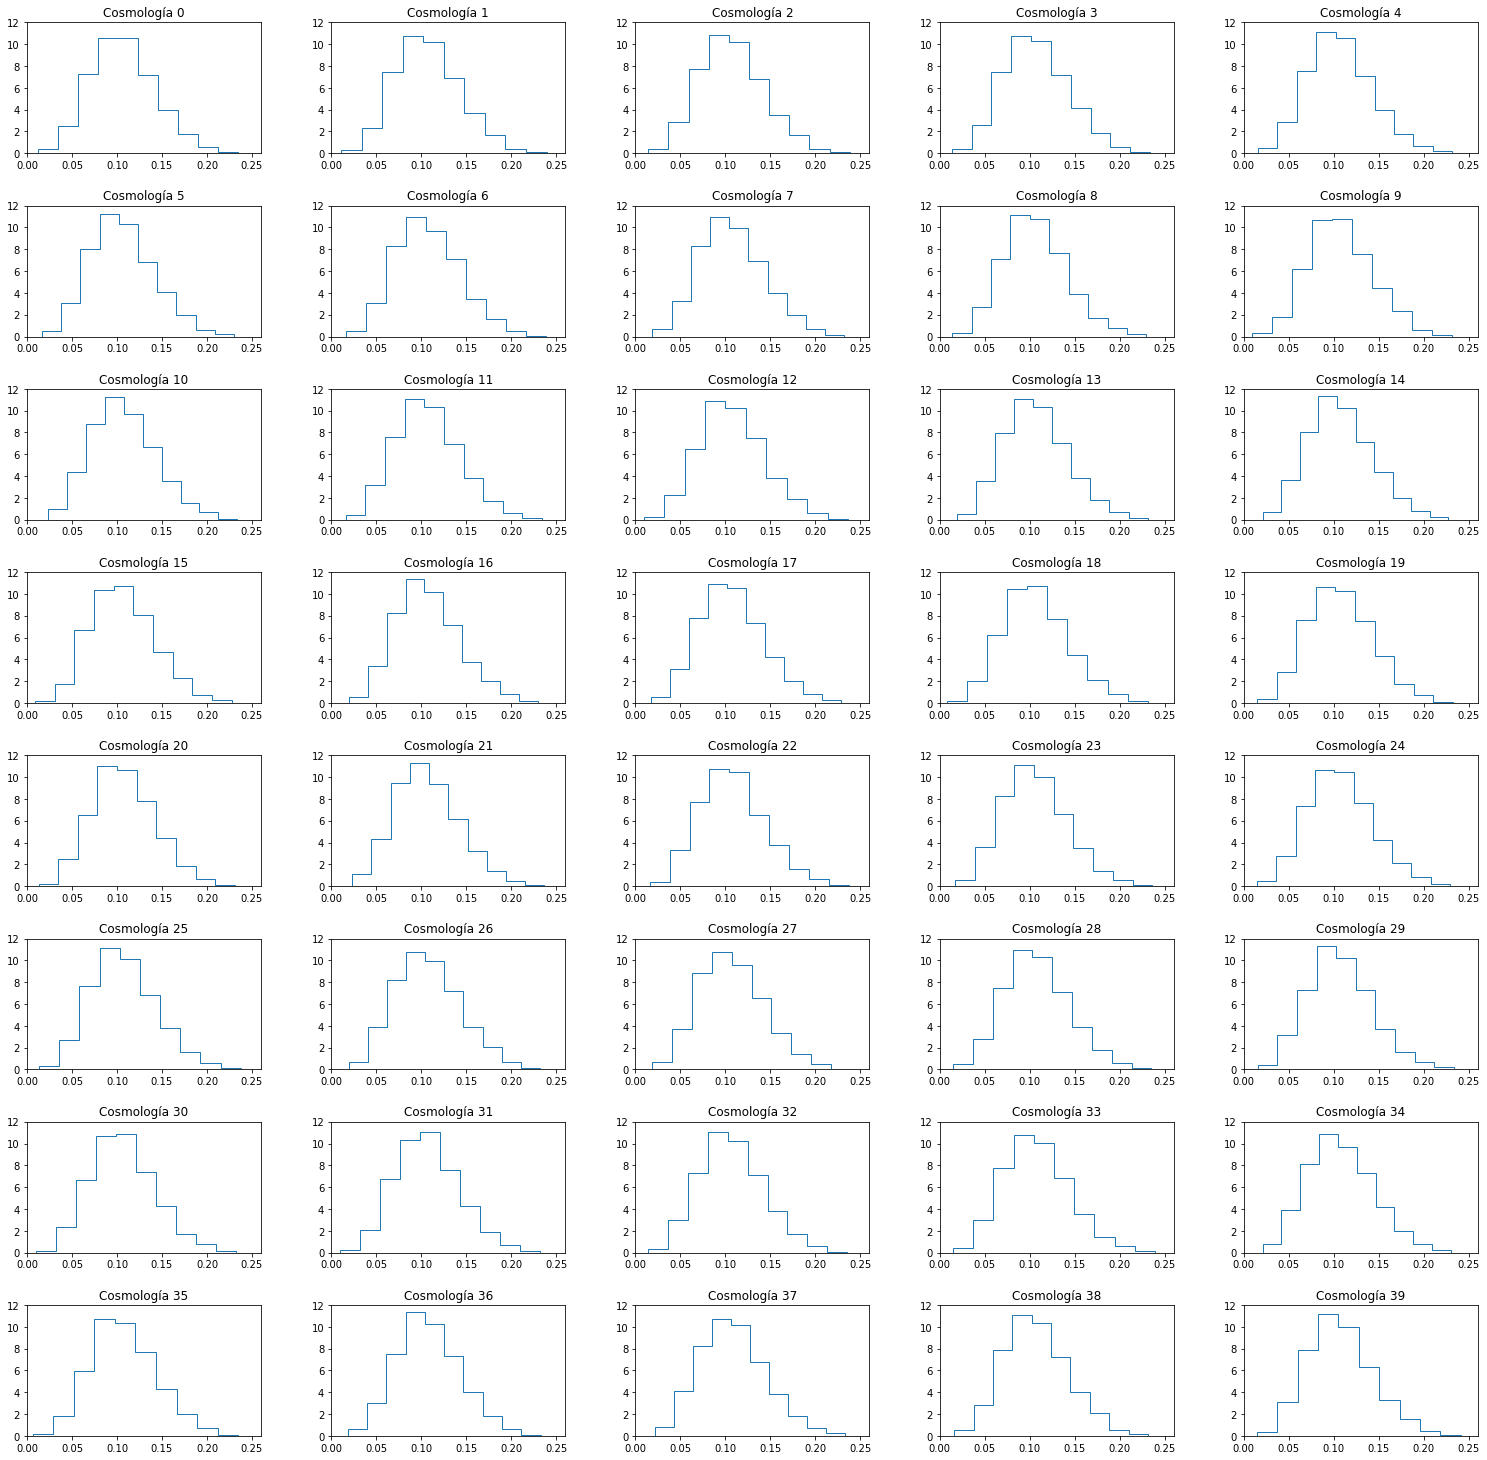

In [10]:
#Elipticidad Normal
fig, axs = plt.subplots(8,5, figsize=(26, 26), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
for i in range(len(CatalogosCorregidos)):
    axs[i].set_title("Cosmología " + str(i))
    e=datosGeometricos[i][1]
    axs[i].hist(e,density=True, histtype="step")
    axs[i].set_xlim(0,0.26)
    axs[i].set_ylim(0,12)
    
#plt.savefig("ElipticidadNormal.png")

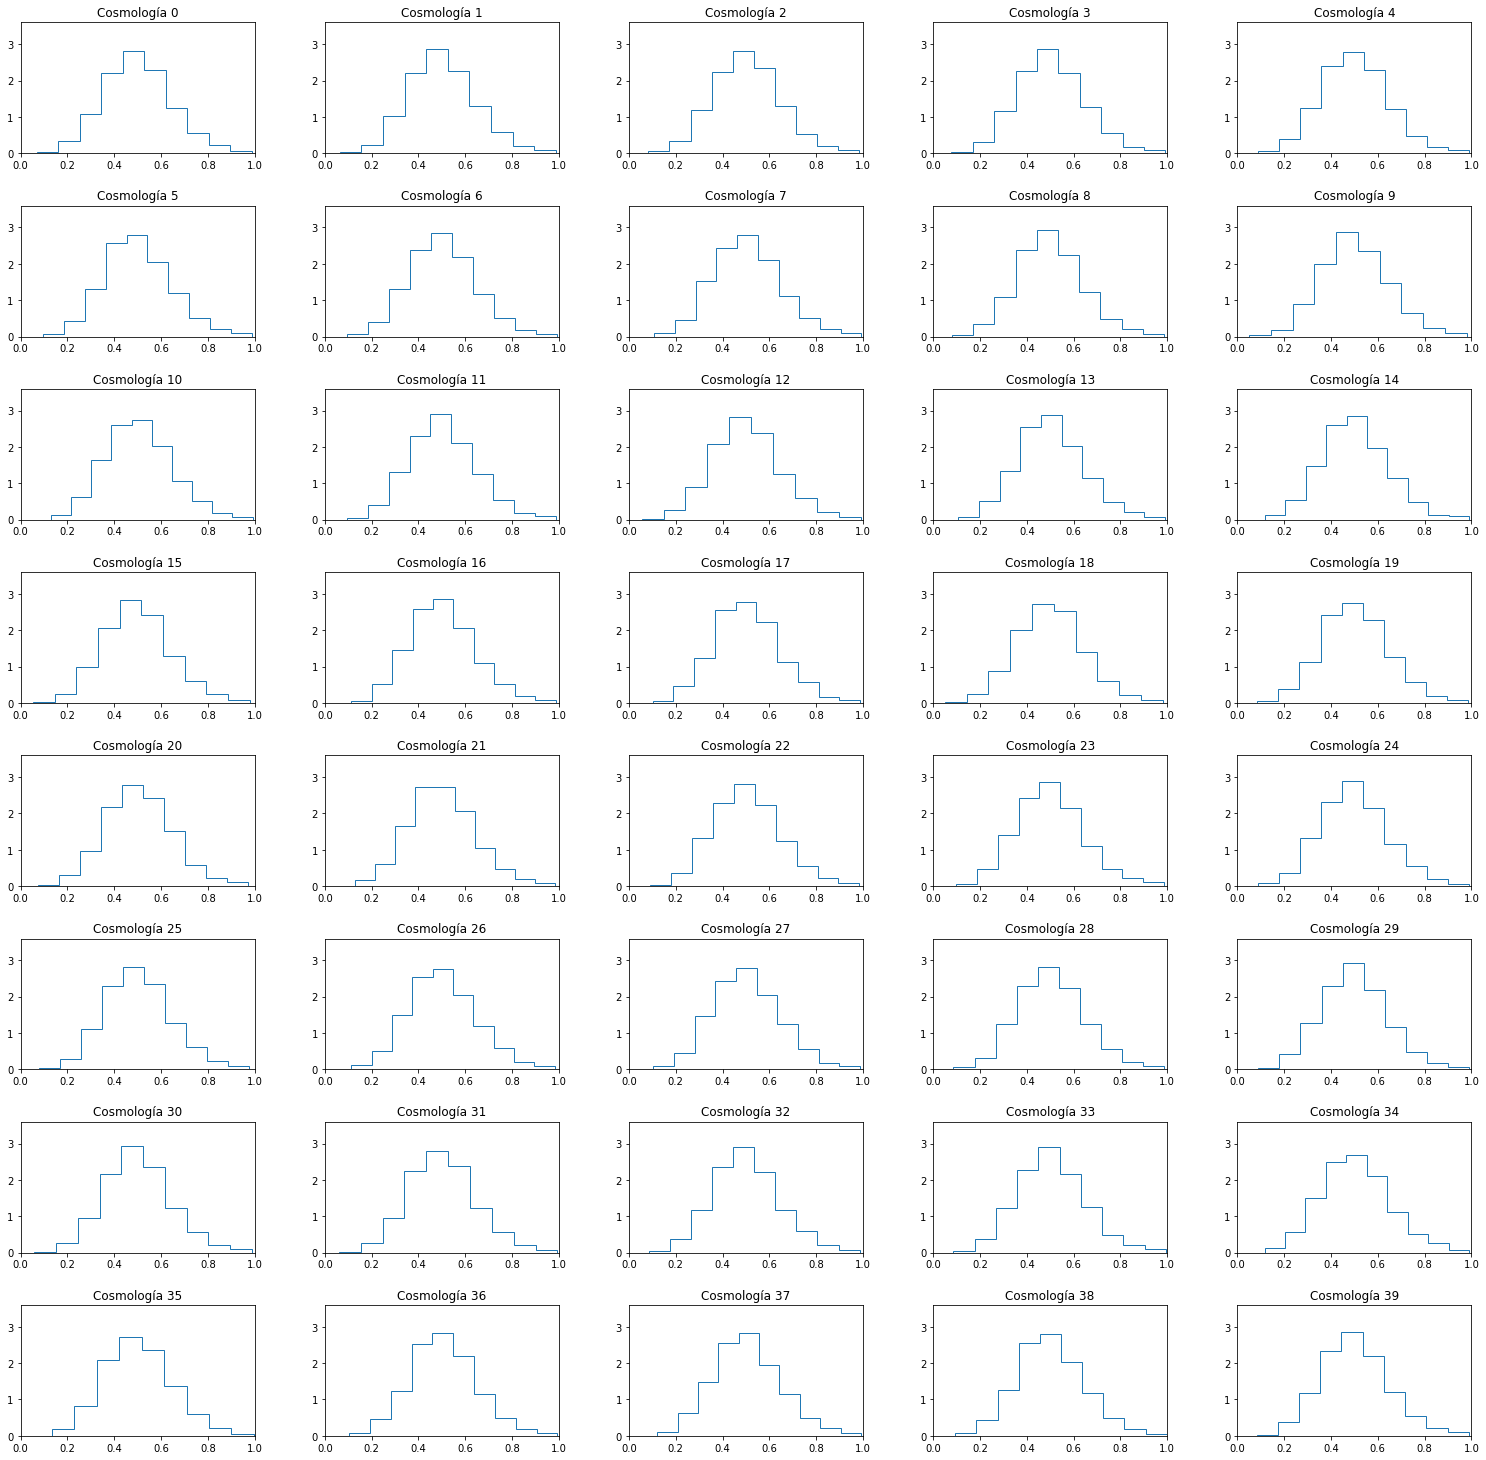

In [11]:
#Elipticidad: 1-c/a
fig, axs = plt.subplots(8,5, figsize=(26, 26), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
for i in range(len(CatalogosCorregidos)):
    axs[i].set_title("Cosmología " + str(i))
    e=datosGeometricos[i][0]
    axs[i].hist(e,density=True, histtype="step")
    axs[i].set_xlim(0,1)
    axs[i].set_ylim(0,3.6)
#plt.savefig("ElipticidadCA.png")

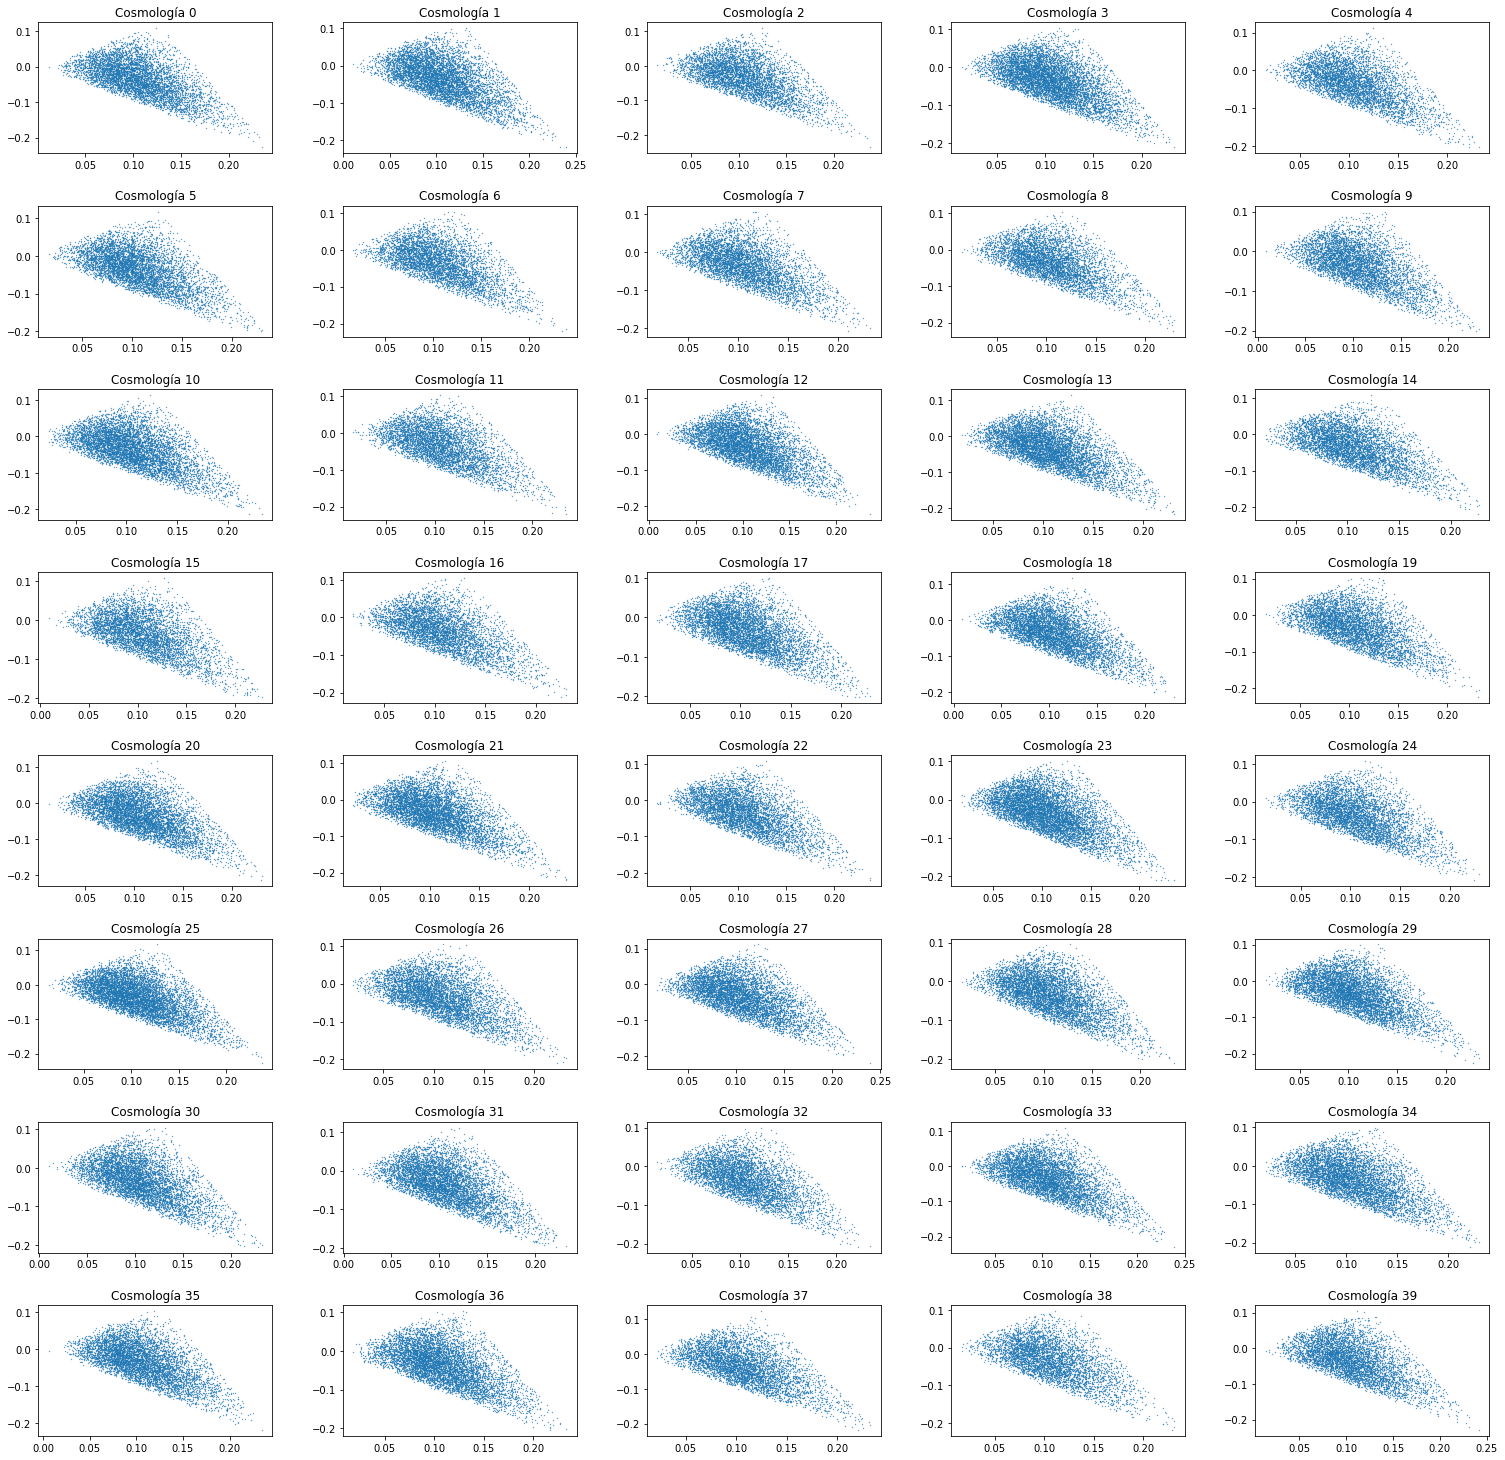

In [12]:
#Elipticidad Vs. Prolacidad
fig, axs = plt.subplots(8,5, figsize=(26, 26), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
for i in range(len(CatalogosCorregidos)):
    axs[i].set_title("Cosmología " + str(i))
    e=datosGeometricos[i][1]
    p=datosGeometricos[i][2]
    axs[i].scatter(e,p,s=0.1)

#plt.savefig("DensidadCosmologias.png")

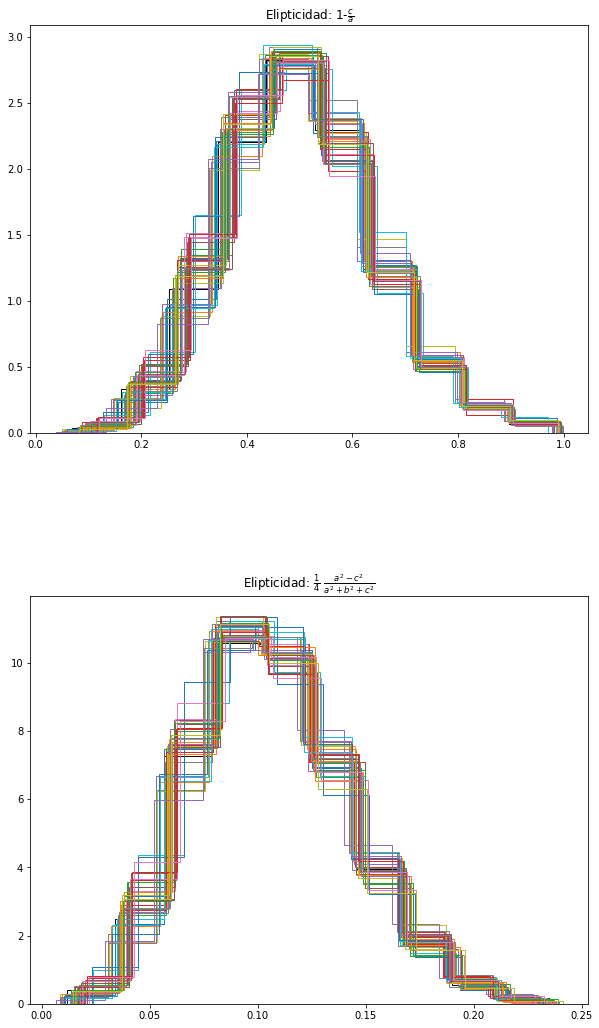

In [13]:
#Elipticidad Vs. Prolacidad
fig, axs = plt.subplots(2,1, figsize=(10, 18), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
axs[0].set_title(r"Elipticidad: 1-$\frac{c}{a}$")
axs[1].set_title(r"Elipticidad: $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
#Caso del 0
e10=datosGeometricos[0][0]
e0=datosGeometricos[0][1]
p0=datosGeometricos[0][2]
axs[0].hist(e10,density=True, histtype="step",label="Cosmología " + str(0),color="black")
axs[1].hist(e0,density=True, histtype="step",label="Cosmología " + str(0),color="black")
#Todos menos el 0
for i in range(len(CatalogosCorregidos)-1):
    e1=datosGeometricos[i+1][0]
    e=datosGeometricos[i+1][1]
    p=datosGeometricos[i+1][2]
    axs[0].hist(e1,density=True, histtype="step",label="Cosmología " + str(i+1))
    axs[1].hist(e,density=True, histtype="step",label="Cosmología " + str(i+1))
#axs[0].legend(loc=0)
#axs[1].legend(loc=0)
#plt.savefig("datosElip.png")

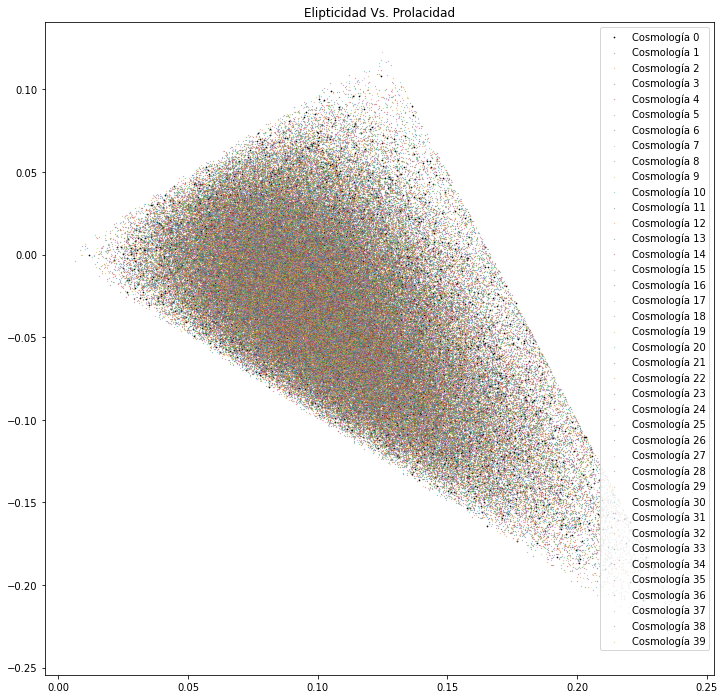

In [14]:
fig=plt.figure(figsize=(12,12))
plt.title("Elipticidad Vs. Prolacidad")
plt.scatter(e0,p0,s=0.45,label="Cosmología " + str(0),color="black")
for i in range(len(CatalogosCorregidos)-1):
    e=datosGeometricos[i+1][1]
    p=datosGeometricos[i+1][2]
    plt.scatter(e,p,s=0.04,label="Cosmología " + str(i+1))
plt.legend(loc=0)
#plt.savefig("datosElipProl.png")

In [15]:
def percentiles(data1):
    data=np.asarray(data1)
    return [np.abs(np.percentile(data,25)),np.percentile(data,50),np.abs(np.percentile(data,75))]

In [16]:
percentilE=[]
percentilE1=[]
for i in range(len(CatalogosCorregidos)):
    e=datosGeometricos[i][1]
    e1=datosGeometricos[i][0]
    d=percentiles(e1)
    f=percentiles(e)
    percentilE.append(f)
    percentilE1.append(d)
percentilE=np.asarray(percentilE)
percentilE1=np.asarray(percentilE1)

In [17]:
percentilE[:,1]

array([0.10437738, 0.10472542, 0.10451   , 0.10494773, 0.10406891,
       0.10323395, 0.10490467, 0.10472611, 0.10457837, 0.10499125,
       0.10477782, 0.10503569, 0.10412557, 0.10451179, 0.10462346,
       0.10423297, 0.10404213, 0.10500691, 0.10453675, 0.1052013 ,
       0.10503298, 0.10379642, 0.10551322, 0.10373709, 0.10524221,
       0.10461449, 0.10494898, 0.10457425, 0.10541022, 0.10418619,
       0.10401403, 0.10491546, 0.10444368, 0.10555423, 0.10520295,
       0.10428382, 0.10545642, 0.10584104, 0.10418474, 0.10438154])

In [18]:
dataE1=np.asarray([np.mean(percentilE1[:,0]),np.mean(percentilE1[:,1]),np.mean(percentilE1[:,2])])

In [19]:
dataE=np.asarray([np.mean(percentilE[:,0]),np.mean(percentilE[:,1]),np.mean(percentilE[:,2])])

In [20]:
print("El valor medio de la Elipticidad es: "+str(dataE1[1]))

El valor medio de la Elipticidad es: 0.49641637089485524


In [21]:
print("El valor medio de la Elipticidad es: " + str(dataE[1]))

El valor medio de la Elipticidad es: 0.10466230365437576


Text(0.5, 0, '$\\epsilon$')

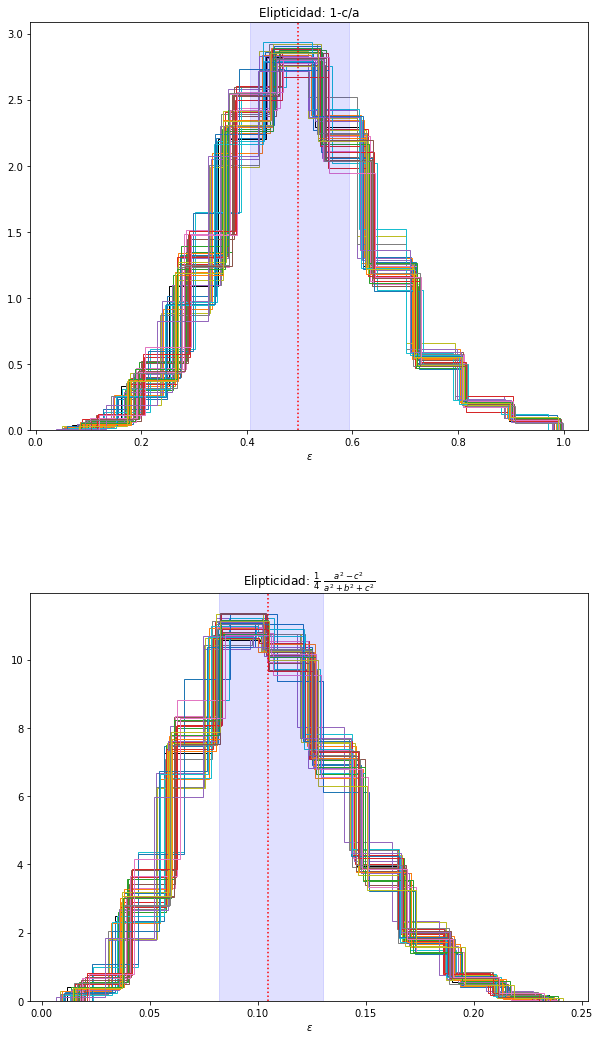

In [22]:
#Elipticidad Vs. Prolacidad
fig, axs = plt.subplots(2,1, figsize=(10, 18), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
axs[0].set_title("Elipticidad: 1-c/a")
axs[1].set_title(r"Elipticidad: $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
#Caso del 0
e10=datosGeometricos[0][0]
e0=datosGeometricos[0][1]
p0=datosGeometricos[0][2]
axs[0].hist(e10,density=True, histtype="step",color="black")
axs[1].hist(e0,density=True, histtype="step",color="black")
#Todos menos el 0
for i in range(len(CatalogosCorregidos)-1):
    e1=datosGeometricos[i+1][0]
    e=datosGeometricos[i+1][1]
    p=datosGeometricos[i+1][2]
    axs[0].hist(e1,density=True, histtype="step")
    axs[1].hist(e,density=True, histtype="step")
#axs[0].legend(loc=0)
#axs[1].legend(loc=0)
axs[0].axvline(dataE1[1],ls = 'dotted',c='red')
axs[0].axvspan(dataE1[0],dataE1[2],alpha=0.12,color='b')
axs[0].set_xlabel(r'$\epsilon$')
axs[1].axvline(dataE[1],ls = 'dotted',c='red')
axs[1].axvspan(dataE[0],dataE[2],alpha=0.12,color='b')
axs[1].set_xlabel(r'$\epsilon$')
#plt.savefig("datosElipticidad.png")

In [23]:
#colores=["Black","Blue","Orange","green","red","purple","brown","pink","grey","y","c","steelblue"]

In [24]:
#Cálculo del Radio Máximo de los Voids
Rmax=[]
VecMax=[]
MaxX=[]
MaxY=[]
for i in range(len(CatalogosCorregidos)):
    V=CatalogosCorregidos[i]
    Rmax.append(np.max(V[:,5]))
    index1 = np.where(V[:,5]==Rmax[i])
    
    def VecindadMaximo(ellip_cat,d):
    
        BoxLength = d
        Trim = 10
    
        halfboxtrim = BoxLength/2 - Trim
    
        a=ellip_cat[index1,1]
        b=ellip_cat[index1,2]
        c=ellip_cat[index1,3]

        index = np.where( 
                (np.abs(ellip_cat[:,1]-a) < halfboxtrim)   & 
                (np.abs(ellip_cat[:,2]-b) < halfboxtrim)   & 
                (np.abs(ellip_cat[:,3]-c) < halfboxtrim) )
    
        return ellip_cat[index[1]]
    VecMax.append(VecindadMaximo(V,200))
    a1=V[index1,1][0][0]
    b1=V[index1,2][0][0]
    MaxX.append(a1)
    MaxY.append(b1)

In [25]:
Rmax

[54.54546624687988,
 60.67668749989008,
 54.91558125886177,
 57.792449677046974,
 63.81269839557309,
 55.228859869223825,
 69.14133131453649,
 59.042892652735624,
 52.39977227232917,
 67.32596917139905,
 58.37846563578844,
 53.85515392712616,
 56.89093779190052,
 52.37639216672567,
 76.58725518565048,
 56.85418935957531,
 66.22918729782516,
 54.51558389020808,
 52.49734830150282,
 56.615492320652535,
 72.32706289784524,
 56.96133891286354,
 62.57409833973337,
 58.31499973471758,
 55.411474181669625,
 59.48413419643968,
 52.44200503381056,
 59.99403325637836,
 53.26244644728835,
 63.659325451877024,
 59.18786384101974,
 50.561919540122496,
 53.70620219027955,
 63.830867972501586,
 66.13914241928603,
 60.82043094505998,
 56.43270884122629,
 59.178102328150615,
 59.92933899600937,
 57.03433241029548]

In [26]:
print("El radio medio es: " +str(np.mean(np.asarray(Rmax))))

El radio medio es: 59.02333855430014


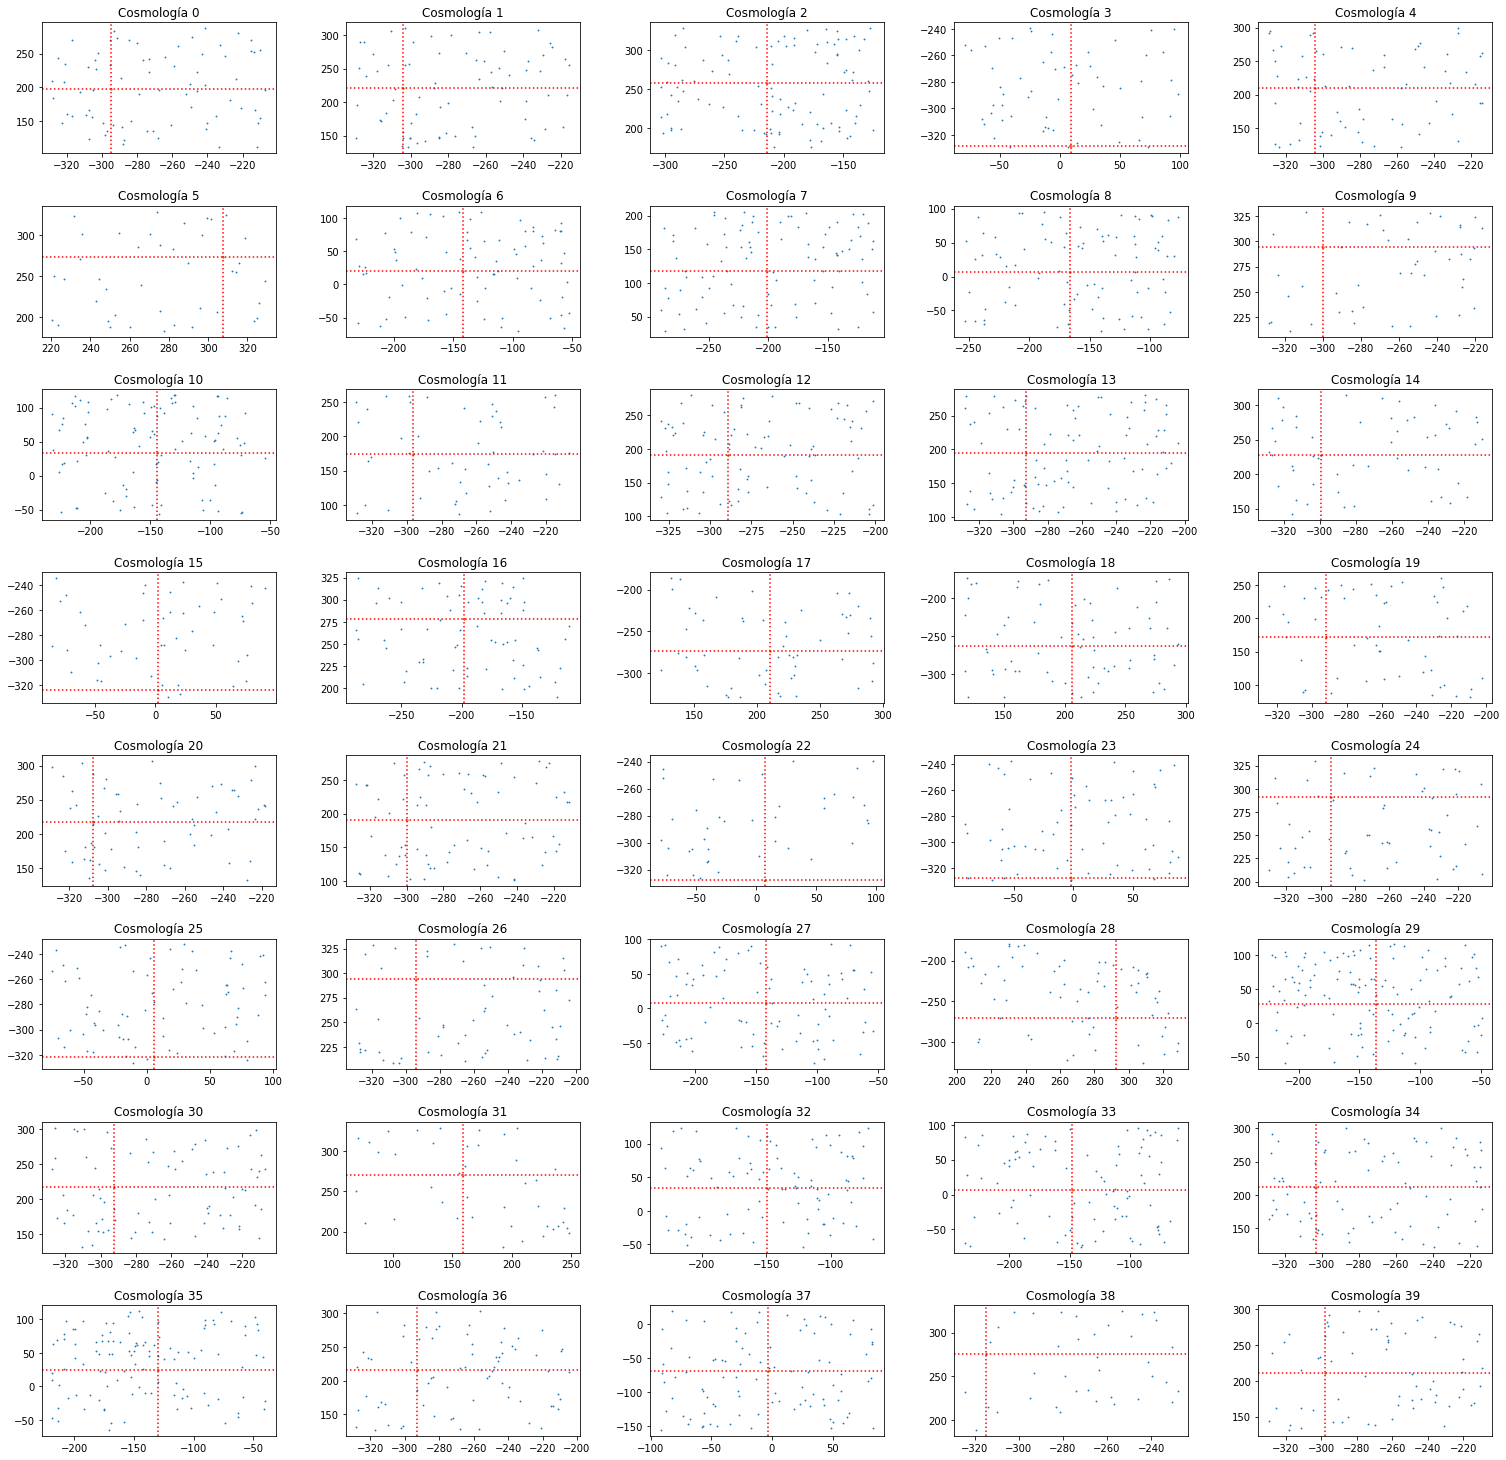

In [27]:
#Vecindades de los Máximos
fig, axs = plt.subplots(8,5, figsize=(26, 26), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.3)
axs=axs.ravel()
for i in range(len(CatalogosCorregidos)):
    axs[i].set_title("Cosmología " + str(i))
    axs[i].scatter(VecMax[i][:,1],VecMax[i][:,2],s=0.7)
    axs[i].scatter(MaxX[i],MaxY[i],s=1.8)
    axs[i].axvline(MaxX[i],ls = 'dotted',c='red')
    axs[i].axhline(MaxY[i],ls = 'dotted',c='red')
#plt.savefig("VecindadMayorVoid.png")

In [28]:
#Fracción de Volumen
def vol(a,b,c):
    return a*b*c*(4*np.pi/3)
Vt=720**3

In [29]:
VolVoid=[]
for i in range(len(CatalogosCorregidos)):
    V=CatalogosCorregidos[i]
    a=V[:,6]
    b=V[:,7]
    c=V[:,8]
    s=np.sum(vol(a,b,c))
    VolVoid.append(s)
VolVoid=np.asarray(VolVoid)

In [30]:
len(VolVoid/Vt)

40

In [31]:
for i in range(len(VolVoid)):
    print("Para la Cosmología " + str(i) + ", la fracción de volumen es: "+ str(np.take(VolVoid/Vt,i)))

Para la Cosmología 0, la fracción de volumen es: 0.21335892806629553
Para la Cosmología 1, la fracción de volumen es: 0.2052229299831091
Para la Cosmología 2, la fracción de volumen es: 0.21152253497679943
Para la Cosmología 3, la fracción de volumen es: 0.2113187843512139
Para la Cosmología 4, la fracción de volumen es: 0.20757174340313894
Para la Cosmología 5, la fracción de volumen es: 0.21428178290013075
Para la Cosmología 6, la fracción de volumen es: 0.20773783702088147
Para la Cosmología 7, la fracción de volumen es: 0.20698341739510606
Para la Cosmología 8, la fracción de volumen es: 0.20774726167461435
Para la Cosmología 9, la fracción de volumen es: 0.2120562885089886
Para la Cosmología 10, la fracción de volumen es: 0.20906019365907977
Para la Cosmología 11, la fracción de volumen es: 0.20326314649041793
Para la Cosmología 12, la fracción de volumen es: 0.20736601949503988
Para la Cosmología 13, la fracción de volumen es: 0.2132153547989277
Para la Cosmología 14, la fracción

In [32]:
print("El valor medio de la Fracción de Volumen es: " +str(np.mean(VolVoid/Vt)))

El valor medio de la Fracción de Volumen es: 0.2098415897743351


In [33]:
#Datos de las Cosmologias
Cosmologias=np.loadtxt("AbacusCosmos_cosmologies.dat")

In [34]:
tit=["ombh2","omcdmh2"," w0"," ns"," sigma_8"," H0"," N_eff"]
ombh2=[]
omcdmh2=[]
w0=[]
ns=[]
sigma_8=[]
H0=[]
N_eff=[]
for i in range(len(Cosmologias)):
    print("Para la Cosmologia "+str(i))
    ombh2.append(np.float32(Cosmologias[i][0]))
    omcdmh2.append(np.float32(Cosmologias[i][1]))
    w0.append(np.float32(Cosmologias[i][2]))
    ns.append(np.float32(Cosmologias[i][3]))
    sigma_8.append(np.float32(Cosmologias[i][4]))
    H0.append(np.float32(Cosmologias[i][5]))
    N_eff.append(np.float32(Cosmologias[i][6]))
    for j in range(7):
        print(tit[j] +" "+ str(np.float32(Cosmologias[i][j])))

Para la Cosmologia 0
ombh2 0.02096096
omcdmh2 0.1224634
 w0 -1.139198
 ns 0.9300325
 sigma_8 0.853824
 H0 68.95004
 N_eff 3.046
Para la Cosmologia 1
ombh2 0.02169908
omcdmh2 0.1096392
 w0 -0.7647829
 ns 0.9823038
 sigma_8 0.7192845
 H0 62.99374
 N_eff 3.046
Para la Cosmologia 2
ombh2 0.02230419
omcdmh2 0.1139937
 w0 -1.083356
 ns 0.9704725
 sigma_8 0.8510273
 H0 72.28562
 N_eff 3.046
Para la Cosmologia 3
ombh2 0.02226266
omcdmh2 0.1221573
 w0 -0.9824886
 ns 0.9754183
 sigma_8 0.8581189
 H0 66.21955
 N_eff 3.046
Para la Cosmologia 4
ombh2 0.02284147
omcdmh2 0.1240096
 w0 -1.221581
 ns 0.9544018
 sigma_8 0.8887367
 H0 74.2083
 N_eff 3.046
Para la Cosmologia 5
ombh2 0.02183059
omcdmh2 0.1284267
 w0 -1.289901
 ns 0.9541059
 sigma_8 0.9129306
 H0 71.52358
 N_eff 3.046
Para la Cosmologia 6
ombh2 0.02166699
omcdmh2 0.1114661
 w0 -0.9692914
 ns 0.9603143
 sigma_8 0.7682739
 H0 68.60432
 N_eff 3.046
Para la Cosmologia 7
ombh2 0.02322985
omcdmh2 0.1063219
 w0 -0.787883
 ns 0.9873686
 sigma_8 0.7

Text(0.5, 0, '$log(V)$  $[Mpc/h]$')

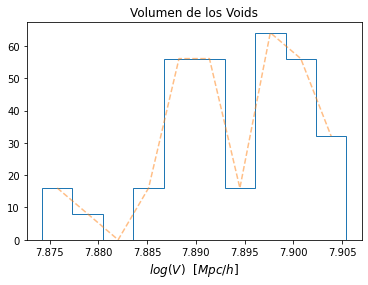

In [35]:
n,x,_=plt.hist(np.log10(VolVoid),density=True, histtype=u"step")
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n,'--',alpha=0.5)
plt.title("Volumen de los Voids")
plt.xlabel('$log(V)$  $[Mpc/h]$',fontsize='large')
#plt.savefig('LogVolumen.png')

In [36]:
cte=[ombh2,omcdmh2, w0, ns, sigma_8, H0]

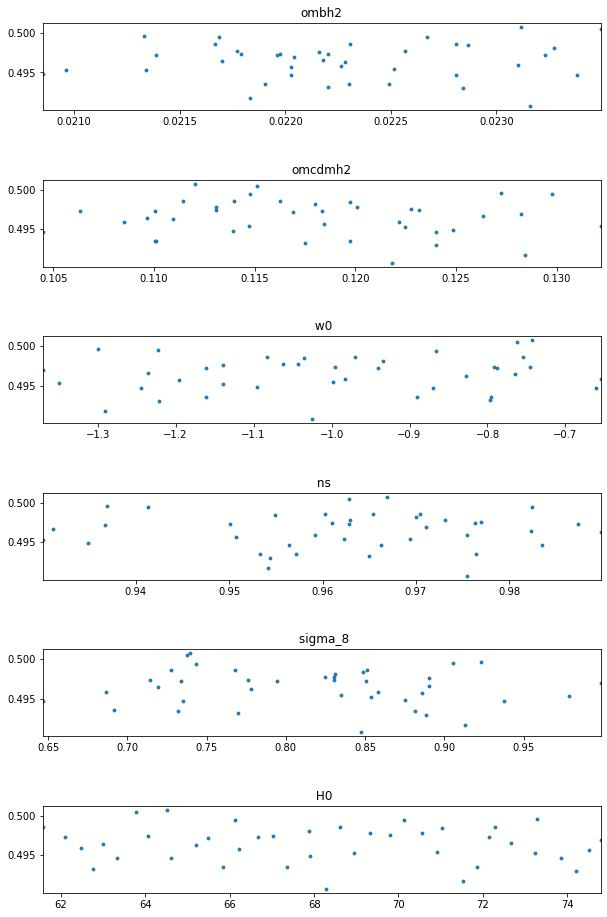

In [37]:
#Gráficas de las Constantes Cosmológicas
fig, axs = plt.subplots(6,1, figsize=(10, 16), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .8, wspace=.3)
axs=axs.ravel()
for i in range(len(cte)):
    axs[i].set_title(tit[i])
    axs[i].scatter(cte[i],percentilE1[:,1],s=8)
    axs[i].set_xlim(np.min(cte[i]),np.max(cte[i]))

In [38]:
E_bound=[np.min(percentilE[:,1]),np.max(percentilE[:,1])]
E1_bound=[np.min(percentilE1[:,1]),np.max(percentilE1[:,1])]

Text(0.5, 0, '$H_0$ [(km/s)/Mpc]')

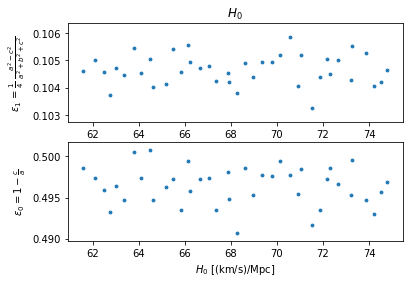

In [39]:
plt.figure(1)
plt.subplot(211)
plt.title('$H_{0}$')
plt.scatter(H0,percentilE[:,1],s=8)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.ylim(E_bound[0]-0.0005,E_bound[1]+0.0005)
plt.subplot(212)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(H0,percentilE1[:,1],s=8)
plt.ylim(E1_bound[0]-0.001,E1_bound[1]+0.001)
plt.xlabel('$H_0$ [(km/s)/Mpc]')
#plt.savefig('H_0.png')

Text(0.5, 0, '$\\sigma_8$')

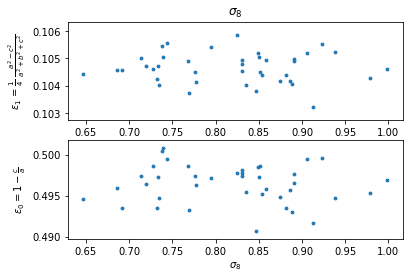

In [40]:
plt.figure(1)
plt.subplot(211)
plt.title(r'$\sigma_8$')
plt.scatter(sigma_8,percentilE[:,1],s=8)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.ylim(E_bound[0]-0.0005,E_bound[1]+0.0005)
plt.subplot(212)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(sigma_8,percentilE1[:,1],s=8)
plt.ylim(E1_bound[0]-0.001,E1_bound[1]+0.001)
plt.xlabel(r'$\sigma_8$')
#plt.savefig('sigma_8.png')

Text(0.5, 0, '$\\Omega_{B}$')

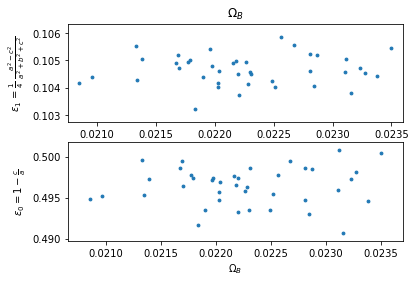

In [41]:
plt.figure(1)
plt.subplot(211)
plt.title('$\Omega_{B}$')
plt.scatter(np.array(ombh2),percentilE[:,1],s=8)
plt.xlim(np.min(np.array(ombh2))-0.0001,np.max((np.array(ombh2)))+0.0001)
plt.ylim(E_bound[0]-0.0005,E_bound[1]+0.0005)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.subplot(212)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(ombh2,percentilE1[:,1],s=8)
plt.ylim(E1_bound[0]-0.001,E1_bound[1]+0.001)
plt.xlim(np.min(ombh2)-0.0002,np.max(ombh2)+0.0002)
plt.xlabel('$\Omega_{B}$')
#plt.savefig('ombh2.png')

Text(0.5, 0, '$\\Omega_{CDM}$')

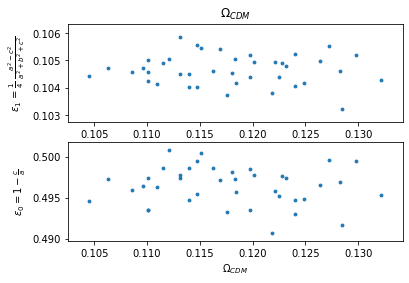

In [42]:
plt.figure(1)
plt.subplot(211)
plt.title('$\Omega_{CDM}$')
plt.scatter(omcdmh2,percentilE[:,1],s=8)
plt.xlim(np.min(omcdmh2)-0.002,np.max(omcdmh2)+0.002)
plt.ylim(E_bound[0]-0.0005,E_bound[1]+0.0005)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.subplot(212)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(omcdmh2,percentilE1[:,1],s=8)
plt.xlim(np.min(omcdmh2)-0.002,np.max(omcdmh2)+0.002)
plt.ylim(E1_bound[0]-0.001,E1_bound[1]+0.001)
plt.xlabel('$\Omega_{CDM}$')
#plt.savefig('omcdmh2.png')

Text(0.5, 0, '$w_0$')

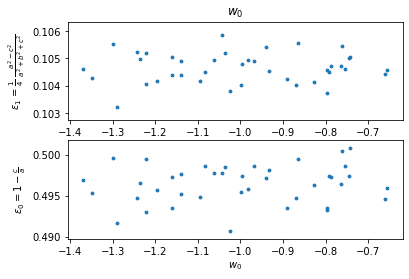

In [43]:
plt.figure(1)
plt.subplot(211)
plt.title('$w_0$')
plt.scatter(w0,percentilE[:,1],s=8)
plt.ylim(E_bound[0]-0.0005,E_bound[1]+0.0005)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.subplot(212)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(w0,percentilE1[:,1],s=8)
plt.ylim(E1_bound[0]-0.001,E1_bound[1]+0.001)
plt.xlabel('$w_0$')
#plt.savefig('w_0.png')

Text(0.5, 0, '$n_s$')

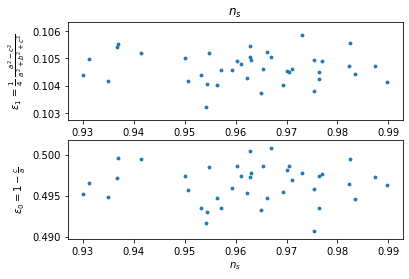

In [44]:
plt.figure(1)
plt.subplot(211)
plt.title('$n_s$')
plt.scatter(ns,percentilE[:,1],s=8)
plt.ylim(E_bound[0]-0.0005,E_bound[1]+0.0005)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.subplot(212)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(ns,percentilE1[:,1],s=8)
plt.ylim(E1_bound[0]-0.001,E1_bound[1]+0.001)
plt.xlabel('$n_s$')
#plt.savefig('n_s.png')

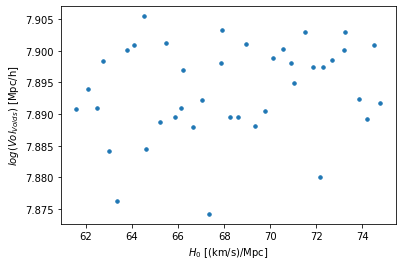

In [45]:
plt.xlabel('$H_0$ [(km/s)/Mpc]')
plt.ylabel('$log(Vol_{Voids})$ [Mpc/h]')
plt.scatter(H0,np.log10(VolVoid),s=12)
#plt.savefig('H_0vsVol.png')

In [46]:
E="Elipticidad: $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$"

In [47]:
E1="Elipticidad: 1-$\frac{c}{a}$"

In [48]:
labels=[]
for i in range(len(H0)):
    linea='$H_0$ = {:.3f}, $\sigma_8$ = {:.3f}, $w_0$ = {:.3f}, $n_s$ = {:.3f}, $omcdmh^2$ = {:.3f}, $ombh^2$ = {:.3f}'.format(H0[i],sigma_8[i],w0[i],ns[i],omcdmh2[i],ombh2[i])
    labels.append(linea)

In [49]:
h_cosm

6.62607015e-34

In [50]:
omde=[0.698,0.669,0.739,0.671,0.733,0.706,0.717,0.709,0.695,0.719,0.677,0.732,0.687,0.670,0.731,0.708,0.727,0.658,0.693,0.717,0.675,0.689,0.723,0.645,0.731,0.633,0.705,0.663,0.676,0.684,0.674,0.702,0.681,0.686,0.692,0.714,0.659,0.727,0.747,0.726]

Text(0.5, 0, '$\\Omega_{DE}$')

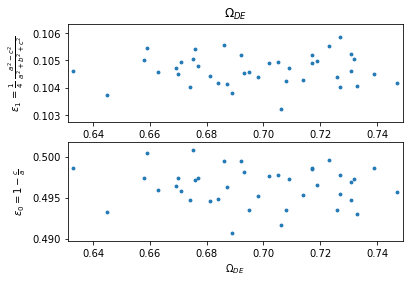

In [51]:
plt.figure(1)
plt.subplot(211)
plt.title('$\Omega_{DE}$')
plt.scatter(omde,percentilE[:,1],s=8)
plt.xlim(np.min(omde)-0.002,np.max(omde)+0.002)
plt.ylim(E_bound[0]-0.0005,E_bound[1]+0.0005)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.subplot(212)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(omde,percentilE1[:,1],s=8)
plt.xlim(np.min(omde)-0.002,np.max(omde)+0.002)
plt.ylim(E1_bound[0]-0.001,E1_bound[1]+0.001)
plt.xlabel('$\Omega_{DE}$')
#plt.savefig('omde.png')

Text(0, 0.5, '$log(Vol_{Voids})$')

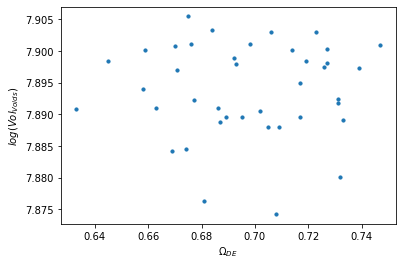

In [52]:
plt.scatter(omde,np.log10(VolVoid),s=10)
plt.xlabel('$\Omega_{DE}$')
plt.ylabel('$log(Vol_{Voids})$')

Text(0.5, 0, '$log(R)$')

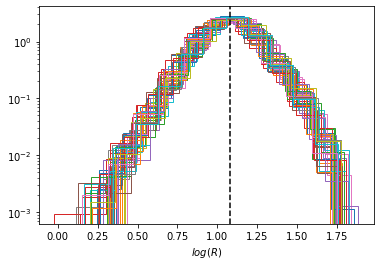

In [140]:
r_mean=[]
dat_histo=[]
for i in CatalogosCorregidos:
    r=np.log10(i[:,5])
    r_mean.append(np.mean(r))
    plt.hist(r, density=True, log=True, histtype='step')
    a,b=np.histogram(r,bins=30)
    dat_histo.append([a,b])
R_0=np.mean(np.asarray(r_mean))
plt.axvline(R_0,ls='--',c='black')
plt.xlabel('$log(R)$')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


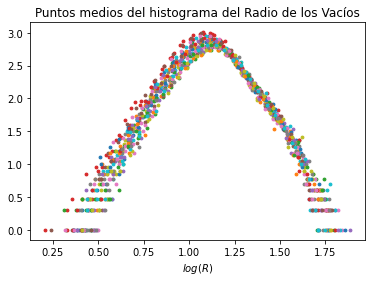

In [245]:
for i in range(len(CatalogosCorregidos)):
    plt.scatter(dat_histo[i][1][2:],np.log10(dat_histo[i][0][1:]),s=8)
plt.title('Puntos medios del histograma del Radio de los Vacíos')
plt.xlabel('$log(R)$')
plt.savefig('puntosmedios_no_fit.png')

In [181]:
def fit_pend(x,y):
    x_1=x[x<R_0]
    x_2=x[x>R_0]
    y_1=y[x<R_0]
    y_2=y[x>R_0]
    m=[np.polyfit(x_1,y_1,1),np.polyfit(x_2,y_2,1)]
    return m

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys
No handles with labels found to put in legend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: overflow encountered in power
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
No handles with labels found to put in legend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

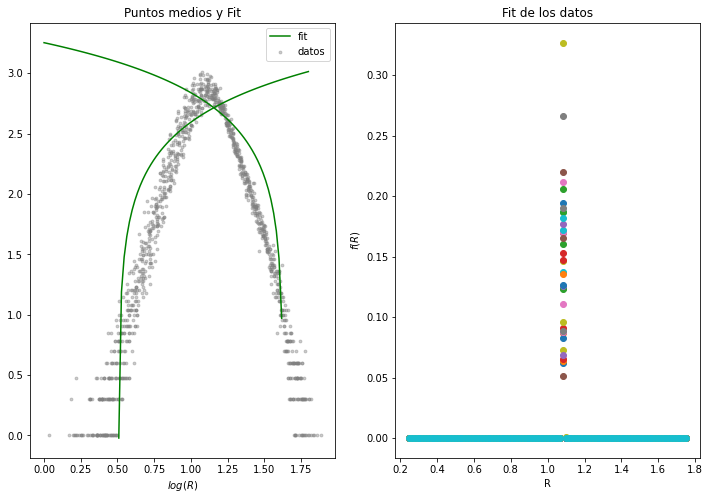

In [252]:
plt.figure(figsize=(12,8))
m_t=[]
for i in range(len(CatalogosCorregidos)):
    plt.subplot(121)
    plt.title('Puntos medios y Fit')
    plt.xlabel('$log(R)$')
    plt.scatter(dat_histo[i][1][1:],np.log10(dat_histo[i][0]),s=8,c='grey',alpha=0.4)
    if i == len(CatalogosCorregidos)-1:
        plt.scatter(dat_histo[i][1][1:],np.log10(dat_histo[i][0]),s=8,c='grey',label='datos',alpha=0.4)
        p=np.linspace(0,1.8,100)
        plt.plot(p,np.log10(f_1(p)),c='green',label='fit')
        plt.plot(p,np.log10(g(p)),c='green')
    plt.legend()
    
    plt.subplot(122)
    plt.title('Fit de los datos')
    def f(x):
        m=fit_pend(dat_histo[i][1][1:],dat_histo[i][0])
        x_p=x/R_0
        a=x_p**(m[1][0])
        b=x_p**(m[0][0])
        return 1/(a+b)
    m_t.append(fit_pend(dat_histo[i][1][1:],dat_histo[i][0]))
    x=np.linspace(0.25,1.75,100)
    plt.scatter(x,f(x))
    plt.xlabel('R')
    plt.ylabel('$f(R)$')
plt.savefig('puntosmedios_fit.png')

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


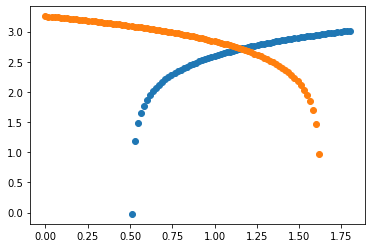

In [239]:
m_1=np.mean(m_t,axis=0)[0]
m_2=np.mean(m_t,axis=0)[1]
def f_1(x):
    return m_1[0]*x+m_1[1]
def g_1(x):
    return m_2[0]*x+m_2[1]
p=np.linspace(0,1.8,100)
plt.scatter(p,np.log10(f_1(p)))
plt.scatter(p,np.log10(g_1(p)))

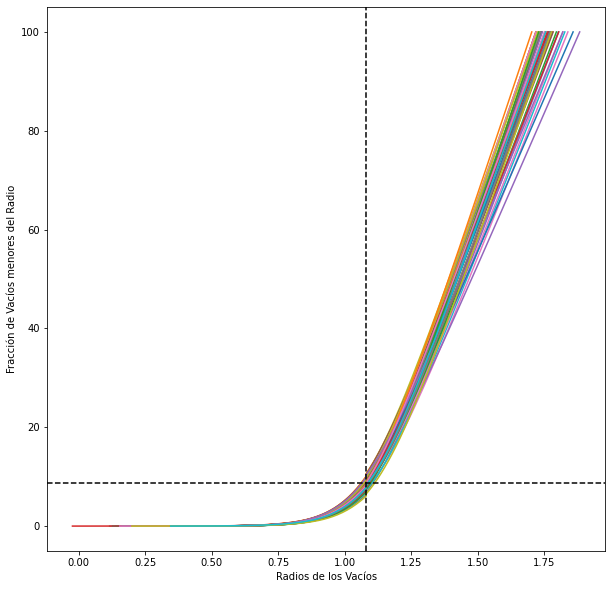

In [81]:
plt.figure(figsize=(10,10))
R_lim=[]
for i in CatalogosCorregidos:
    r=np.log10(i[:,5])
    mini=np.min(r)
    maxi=np.max(r)
    x=np.append(np.linspace(mini,R_0,100),np.linspace(R_0,maxi,100))
    y=[]
    l=len(r)
    for j in x:
        y.append(len(np.where(r<j)[0]))
    y=np.array(y)
    R_lim.append(100*np.cumsum(y)/np.sum(y))
    plt.plot(x,100*np.cumsum(y)/np.sum(y))
R_y=np.mean(np.array(R_lim)[:,100])
plt.xlabel('Radios de los Vacíos')
plt.ylabel('Fracción de Vacíos menores del Radio')
plt.axvline(R_0,ls='--',c='black')
plt.axhline(R_y,ls='--',c='black')
#plt.savefig('Radios_all.png')

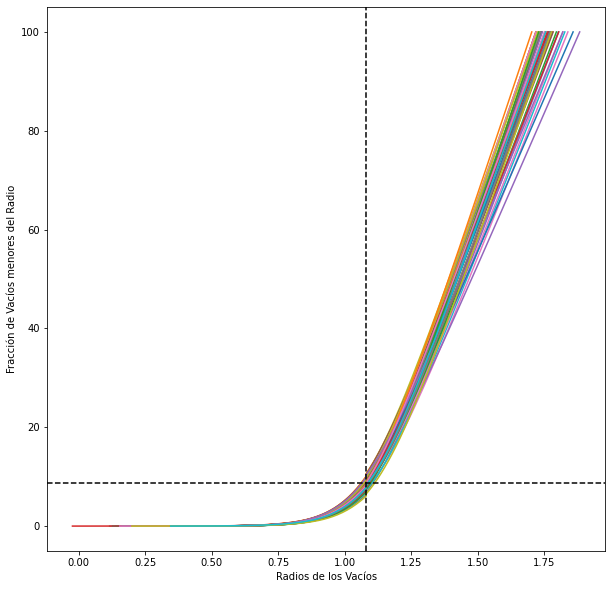

In [82]:
plt.figure(figsize=(10,10))
R_lim=[]
for i in CatalogosCorregidos:
    r=np.log10(i[:,5])
    mini=np.min(r)
    maxi=np.max(r)
    x=np.append(np.linspace(mini,R_0,100),np.linspace(R_0,maxi,100))
    y=[]
    l=len(r)
    for j in x:
        y.append(len(np.where(r<j)[0]))
    y=np.array(y)
    R_lim.append(100*np.cumsum(y)/np.sum(y))
    plt.plot(x,100*np.cumsum(y)/np.sum(y))
R_y=np.mean(np.array(R_lim)[:,100])
plt.xlabel('Radios de los Vacíos')
plt.ylabel('Fracción de Vacíos menores del Radio')
plt.axvline(R_0,ls='--',c='black')
plt.axhline(R_y,ls='--',c='black')

#plt.savefig('Radios_all.png')

In [83]:
np.append(np.linspace(mini,R_0,100),np.linspace(R_0,maxi,100))[100]-R_0

0.0

In [84]:
datos_R0=[]
for i in CatalogosCorregidos:
    index=np.where(np.log10(i[:,5])>=R_0)
    datos_R0.append(i[index])
    print(np.shape(i[index]))

(2667, 18)
(2682, 18)
(2527, 18)
(2733, 18)
(2567, 18)
(2709, 18)
(2577, 18)
(2676, 18)
(2621, 18)
(2676, 18)
(2668, 18)
(2573, 18)
(2770, 18)
(2735, 18)
(2578, 18)
(2624, 18)
(2567, 18)
(2642, 18)
(2716, 18)
(2658, 18)
(2697, 18)
(2759, 18)
(2602, 18)
(2755, 18)
(2624, 18)
(2641, 18)
(2664, 18)
(2643, 18)
(2634, 18)
(2680, 18)
(2720, 18)
(2703, 18)
(2583, 18)
(2676, 18)
(2699, 18)
(2691, 18)
(2744, 18)
(2567, 18)
(2548, 18)
(2703, 18)


In [85]:
np.shape(datos_R0[0])

(2667, 18)

In [86]:
geo_R0=[]
for i in datos_R0:
    dat=datosGeo(i)
    geo_R0.append(dat)

In [87]:
dat_med=[]
dat_std=[]
for i in geo_R0:
    dat_med.append(np.mean(i,axis=1))
    dat_std.append(np.std(i,axis=1))

In [88]:
dat_std

[array([0.11303939, 0.02920423, 0.04257439]),
 array([0.10808458, 0.02833235, 0.04208514]),
 array([0.11218909, 0.0290669 , 0.04348432]),
 array([0.10590143, 0.02792518, 0.04219244]),
 array([0.11009892, 0.02864849, 0.04233746]),
 array([0.10879005, 0.02841212, 0.04212254]),
 array([0.11089695, 0.02894233, 0.04253069]),
 array([0.1089729 , 0.02830246, 0.04134838]),
 array([0.10733352, 0.02757165, 0.04085803]),
 array([0.1110352 , 0.02874426, 0.04227951]),
 array([0.10551436, 0.0276293 , 0.04133669]),
 array([0.10932298, 0.02840653, 0.04284631]),
 array([0.10990057, 0.02865256, 0.04213326]),
 array([0.10633451, 0.02808958, 0.0416047 ]),
 array([0.10940182, 0.02861468, 0.0418026 ]),
 array([0.10960063, 0.02875488, 0.04232848]),
 array([0.10821908, 0.0285473 , 0.04328076]),
 array([0.10642582, 0.02824894, 0.04256989]),
 array([0.10997709, 0.0288958 , 0.04234565]),
 array([0.10983103, 0.02863232, 0.04309776]),
 array([0.10802811, 0.02840244, 0.04252476]),
 array([0.10878752, 0.02842282, 0.

In [89]:
dat_med=np.array(dat_med)
dat_std=np.array(dat_std)

In [90]:
len(dat_std[:,1])

40

Text(0.5, 0, '$H_0$ [(km/s)/Mpc]')

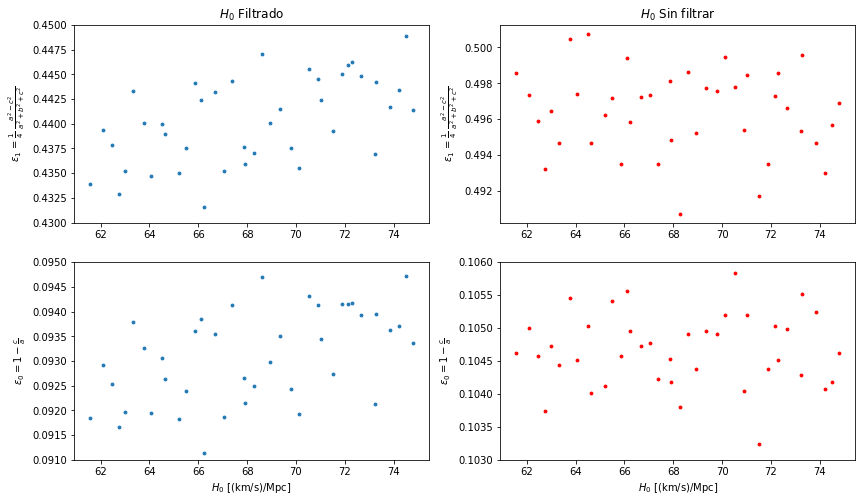

In [91]:
plt.figure(figsize=(14,8))
plt.subplot(221)
plt.title('$H_{0}$ Filtrado')
plt.scatter(H0,dat_med[:,0],s=8)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.ylim(0.43,0.45)
plt.subplot(223)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(H0,dat_med[:,1],s=8)
plt.ylim(0.091,0.095)
plt.xlabel('$H_0$ [(km/s)/Mpc]')
plt.subplot(222)
plt.title('$H_{0}$ Sin filtrar')
plt.scatter(H0,percentilE1[:,1],s=8,c='red')
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.ylim(E1_bound[0]-0.0005,E1_bound[1]+0.0005)
plt.subplot(224)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(H0,percentilE[:,1],s=8,c='red')
plt.ylim(0.103,0.106)
plt.xlabel('$H_0$ [(km/s)/Mpc]')
#plt.savefig('H_0_Filt.png')

Text(0.5, 0, '$\\sigma_8$')

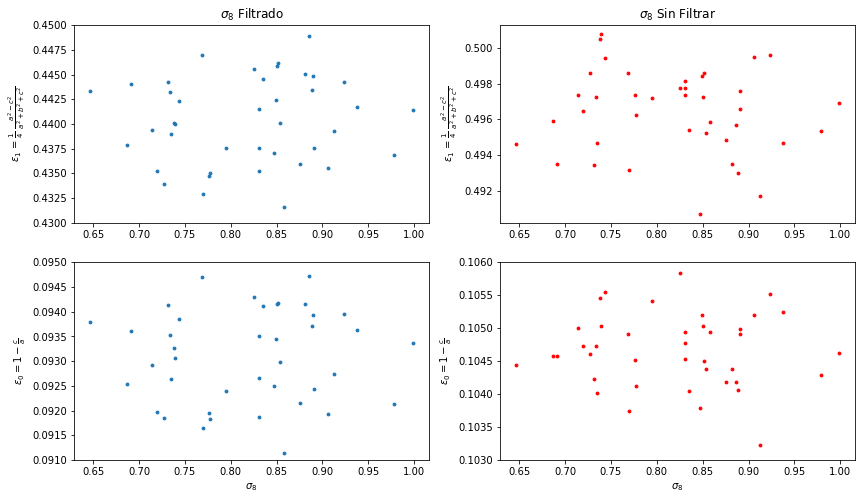

In [92]:
plt.figure(figsize=(14,8))
plt.subplot(221)
plt.title(r'$\sigma_8$ Filtrado')
plt.scatter(sigma_8,dat_med[:,0],s=8)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.ylim(0.43,0.45)
plt.subplot(223)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(sigma_8,dat_med[:,1],s=8)
plt.ylim(0.091,0.095)
plt.xlabel(r'$\sigma_8$')
plt.subplot(222)
plt.title(r'$\sigma_8$ Sin Filtrar')
plt.scatter(sigma_8,percentilE1[:,1],s=8,c='red')
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.ylim(E1_bound[0]-0.0005,E1_bound[1]+0.0005)
plt.subplot(224)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(sigma_8,percentilE[:,1],s=8,c='red')
plt.ylim(0.103,0.106)
plt.xlabel(r'$\sigma_8$')
#plt.savefig('sigma_8_fit.png')

Text(0.5, 0, '$\\Omega_{B}$')

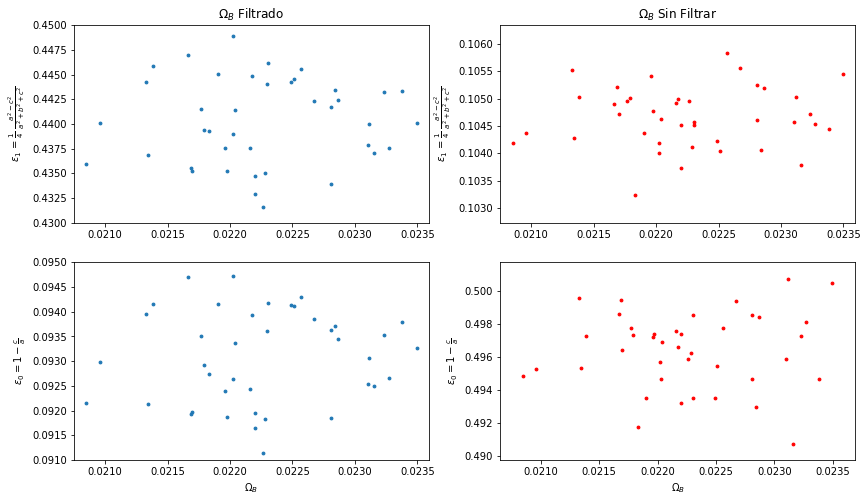

In [93]:
plt.figure(figsize=(14,8))
plt.subplot(221)
plt.title('$\Omega_{B}$ Filtrado')
plt.scatter(np.array(ombh2),dat_med[:,0],s=8)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.ylim(0.43,0.45)
plt.xlim(np.min(np.array(ombh2))-0.0001,np.max((np.array(ombh2)))+0.0001)
plt.subplot(223)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(np.array(ombh2),dat_med[:,1],s=8)
plt.xlim(np.min(np.array(ombh2))-0.0001,np.max((np.array(ombh2)))+0.0001)
plt.ylim(0.091,0.095)
plt.xlabel(r'$\Omega_{B}$')
plt.subplot(222)
plt.title('$\Omega_{B}$ Sin Filtrar')
plt.scatter(np.array(ombh2),percentilE[:,1],s=8,c='red')
plt.xlim(np.min(np.array(ombh2))-0.0001,np.max((np.array(ombh2)))+0.0001)
plt.ylim(E_bound[0]-0.0005,E_bound[1]+0.0005)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.subplot(224)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(ombh2,percentilE1[:,1],s=8,c='red')
plt.ylim(E1_bound[0]-0.001,E1_bound[1]+0.001)
plt.xlim(np.min(ombh2)-0.0002,np.max(ombh2)+0.0002)
plt.xlabel('$\Omega_{B}$')
#plt.savefig('omb_fit.png')

Text(0.5, 0, '$\\Omega_{CDM}$')

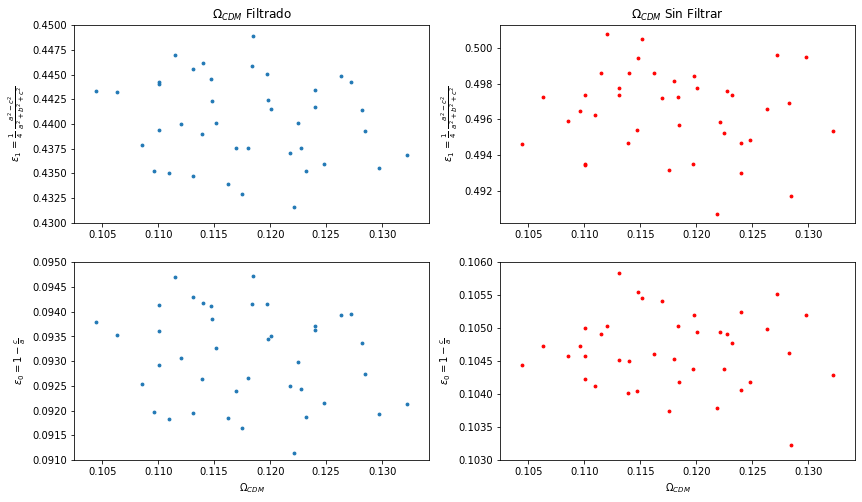

In [94]:
plt.figure(figsize=(14,8))
plt.subplot(221)
plt.title('$\Omega_{CDM}$ Filtrado')
plt.xlim(np.min(omcdmh2)-0.002,np.max(omcdmh2)+0.002)
plt.scatter(np.array(omcdmh2),dat_med[:,0],s=8)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.ylim(0.43,0.45)
plt.subplot(223)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(np.array(omcdmh2),dat_med[:,1],s=8)
plt.xlim(np.min(omcdmh2)-0.002,np.max(omcdmh2)+0.002)
plt.ylim(0.091,0.095)
plt.xlabel(r'$\Omega_{CDM}$')

plt.subplot(222)
plt.title('$\Omega_{CDM}$ Sin Filtrar')
plt.scatter(omcdmh2,percentilE1[:,1],s=8,c='red')
plt.xlim(np.min(omcdmh2)-0.002,np.max(omcdmh2)+0.002)
plt.ylim(E1_bound[0]-0.0005,E1_bound[1]+0.0005)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.subplot(224)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(omcdmh2,percentilE[:,1],s=8,c='red')
plt.xlim(np.min(omcdmh2)-0.002,np.max(omcdmh2)+0.002)
plt.ylim(0.103,0.106)
plt.xlabel('$\Omega_{CDM}$')
#plt.savefig('omcdm_fit.png')

Text(0.5, 0, '$w_0$')

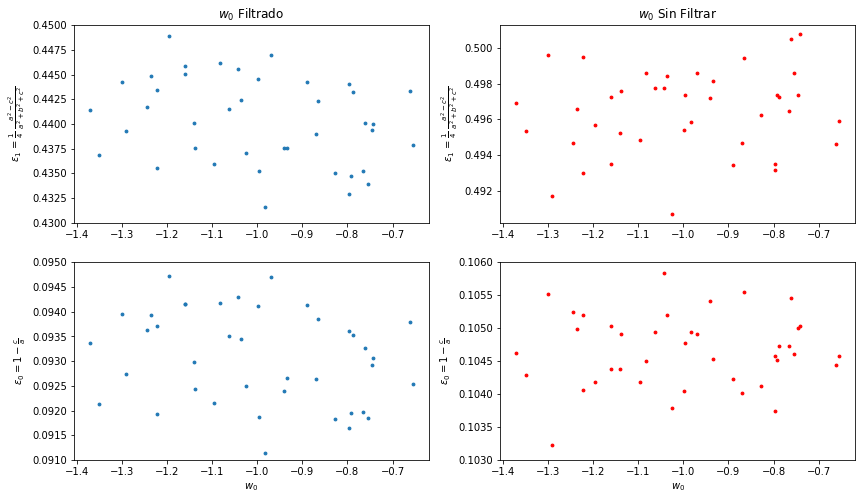

In [95]:
plt.figure(figsize=(14,8))
plt.subplot(221)
plt.title('$w_0$ Filtrado')
plt.scatter(np.array(w0),dat_med[:,0],s=8)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.ylim(0.43,0.45)
plt.subplot(223)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(np.array(w0),dat_med[:,1],s=8)
plt.ylim(0.091,0.095)
plt.xlabel(r'$w_0$')

plt.subplot(222)
plt.title('$w_0$ Sin Filtrar')
plt.scatter(w0,percentilE1[:,1],s=8,c='red')
plt.ylim(E1_bound[0]-0.0005,E1_bound[1]+0.0005)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.subplot(224)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(w0,percentilE[:,1],s=8,c='red')
plt.ylim(0.103,0.106)
plt.xlabel('$w_0$')
#plt.savefig('w0_filt.png')

Text(0.5, 0, '$n_s$')

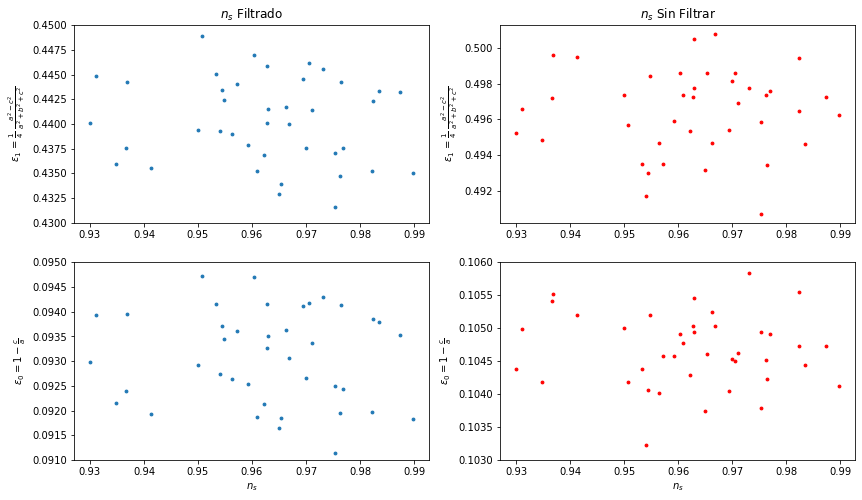

In [96]:
plt.figure(figsize=(14,8))
plt.subplot(221)
plt.title('$n_s$ Filtrado')
plt.scatter(np.array(ns),dat_med[:,0],s=8)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.ylim(0.43,0.45)
plt.subplot(223)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(np.array(ns),dat_med[:,1],s=8)
plt.ylim(0.091,0.095)
plt.xlabel(r'$n_s$')

plt.subplot(222)
plt.title('$n_s$ Sin Filtrar')
plt.scatter(ns,percentilE1[:,1],s=8,c='red')
plt.ylim(E1_bound[0]-0.0005,E1_bound[1]+0.0005)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.subplot(224)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(ns,percentilE[:,1],s=8,c='red')
plt.ylim(0.103,0.106)
plt.xlabel('$n_s$')

#plt.savefig('ns_filt.png')

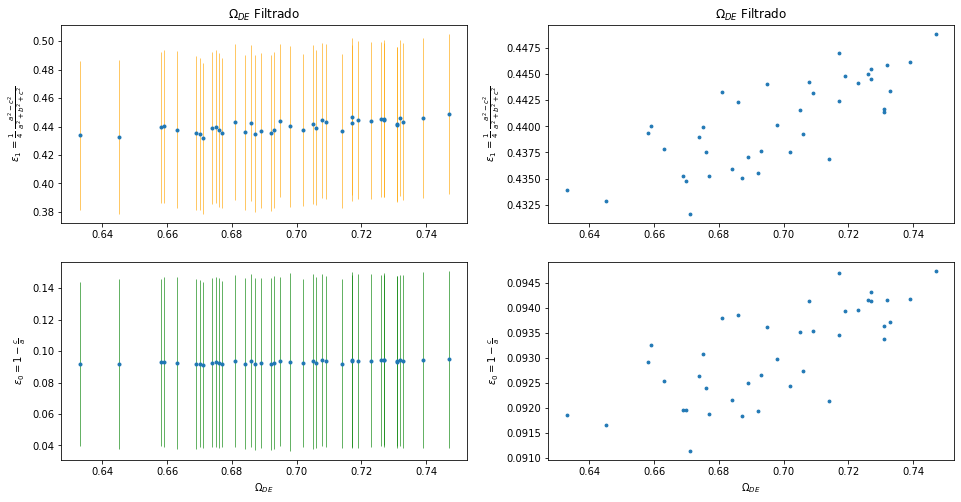

In [110]:
plt.figure(figsize=(16,8))
plt.subplot(221)
plt.title('$\Omega_{DE}$ Filtrado')
plt.errorbar(np.array(omde),dat_med[:,0],yerr=dat_std[:,0]/2,fmt='o',markersize=3,ecolor='orange',elinewidth=0.6)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
#plt.ylim(0.43,0.45)
plt.subplot(223)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.errorbar(np.array(omde),dat_med[:,1],yerr=dat_std[:,0]/2,fmt='o',markersize=3,ecolor='green',elinewidth=0.6)
#plt.ylim(0.09,0.1)
plt.xlabel(r'$\Omega_{DE}$')

plt.subplot(222)
plt.title('$\Omega_{DE}$ Filtrado')
plt.scatter(np.array(omde),dat_med[:,0],s=8)
plt.ylabel(r"$\epsilon_{1}$ = $\frac{1}{4}$ $\frac{a^2 - c^2}{a^2 + b^2 + c^2}$")
plt.subplot(224)
plt.ylabel(r"$\epsilon_{0} = 1 - \frac{c}{a}$")
plt.scatter(np.array(omde),dat_med[:,1],s=8)
plt.xlabel(r'$\Omega_{DE}$')
plt.savefig('omde_filt_yerr_final.png')

Text(0.5, 0, '$\\Omega_{DE}$')

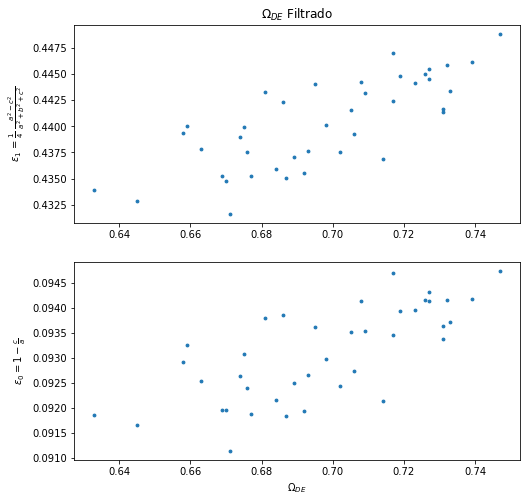